# Dataset valores perceptuales

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('Data/santiago_valores_perceptuales.csv')
df.head()

,latlong,beautiful,boring,depressing,lively,safe,wealthy,lat,lon,comuna,hogares,hog_40pct,pct_hog40p,AVE_GSE,uf2018
0,"-33.323944,-70.51263428391168",-0.306948,1.565049,0.572029,-1.137733,-0.120456,-0.561887,-33.323944,-70.512634,Lo Barnechea,1087.0,10,0.0092,ABC1,80.723424
1,"-33.323944,-70.5127291",-0.421388,0.309495,0.368965,-0.098733,-0.103042,-0.162294,-33.323944,-70.512729,Lo Barnechea,1087.0,10,0.0092,ABC1,80.723424
2,"-33.323944,-70.51298714285714",0.116505,0.164284,-0.110312,0.063860,0.391172,0.226372,-33.323944,-70.512987,Lo Barnechea,1087.0,10,0.0092,ABC1,80.723424
3,"-33.323944,-70.51343609999999",-0.159113,-0.500987,-0.213503,0.635165,0.300856,0.453708,-33.323944,-70.513436,Lo Barnechea,1087.0,10,0.0092,ABC1,80.723424
4,"-33.323944,-70.51379769565217",-1.226162,1.176751,1.462015,-0.842954,-0.946355,-0.936168,-33.323944,-70.513798,Lo Barnechea,1087.0,10,0.0092,ABC1,80.723424


<Axes: ylabel='Frequency'>

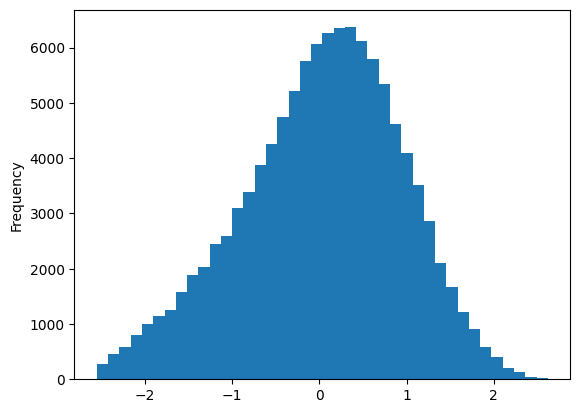

In [11]:
df.depressing.plot(kind='hist', bins=40)

In [47]:
df2 = pd.read_csv('Data/vars_perceptuales_santiago.csv')
df2


,latlong,beautiful,boring,depressing,lively,safe,wealthy,lat,lon
0,"-33.323944,-70.51263428391168",-0.306948,1.565049,0.572029,-1.137733,-0.120456,-0.561887,-33.323944,-70.512634
1,"-33.323944,-70.5127291",-0.421388,0.309495,0.368965,-0.098733,-0.103042,-0.162294,-33.323944,-70.512729
2,"-33.323944,-70.51298714285714",0.116505,0.164284,-0.110312,0.063860,0.391172,0.226372,-33.323944,-70.512987
3,"-33.323944,-70.51343609999999",-0.159113,-0.500987,-0.213503,0.635165,0.300856,0.453708,-33.323944,-70.513436
4,"-33.323944,-70.51379769565217",-1.226162,1.176751,1.462015,-0.842954,-0.946355,-0.936168,-33.323944,-70.513798
...,...,...,...,...,...,...,...,...,...
121346,"-33.67884090851735,-70.68059514195582",-1.318599,2.201657,1.673377,-2.265229,-1.677807,-2.014101,-33.678841,-70.680595
121347,"-33.67884090851735,-70.69912023659306",0.827014,1.129426,-0.431715,-1.053424,0.438107,0.078089,-33.678841,-70.699120
121348,"-33.67884090851735,-70.70653027444796",0.975725,0.838188,-0.583064,-0.515637,0.957951,0.547197,-33.678841,-70.706530
121349,"-33.67884090851735,-70.7176453312303",-0.629273,0.780489,0.881986,-1.363918,-1.328026,-1.726176,-33.678841,-70.717645


In [59]:
df.drop(['division', 'node_id', 'prom_ismt'], axis=1).to_csv('Data/santiago_valores_perceptuales.csv', index=False)

In [40]:
df.AVE_GSE.value_counts()

AVE_GSE
D       51778
C3      24534
C2      22916
ABC1    11661
E         193
Name: count, dtype: int64

## Tipo de datos

In [3]:
df.dtypes

latlong        object
beautiful     float64
boring        float64
depressing    float64
lively        float64
safe          float64
wealthy       float64
lat           float64
lon           float64
comuna         object
node_id         int64
division       object
prom_ismt     float64
hogares       float64
hog_40pct       int64
pct_hog40p    float64
AVE_GSE        object
uf2018        float64
dtype: object

## Drop missing values

In [4]:
print(df.isnull().sum())

latlong       0
beautiful     0
boring        0
depressing    0
lively        0
safe          0
wealthy       0
lat           0
lon           0
comuna        0
node_id       0
division      0
prom_ismt     0
hogares       0
hog_40pct     0
pct_hog40p    0
AVE_GSE       0
uf2018        0
dtype: int64


In [54]:
filter = df[(df['beautiful'] >= -2) & (df['beautiful'] <= 2)
            & (df['boring'] >= -2) & (df['boring'] <= 2)
            & (df['lively'] >= -2) & (df['lively'] <= 2)]

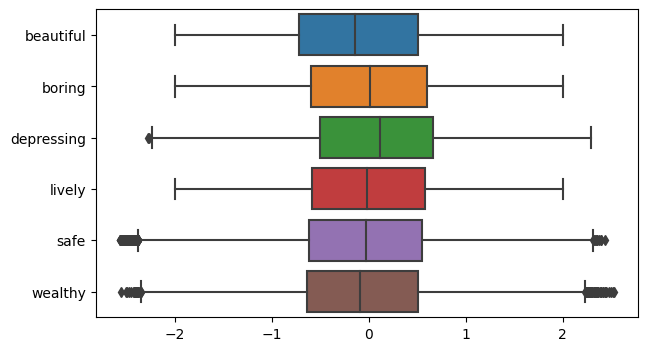

In [55]:
plt.figure(figsize=(7,4))
boxplot = sns.boxplot(data=filter.iloc[:, [1,2,3,4,5,6]], orient="h")
plt.show()

<Axes: >

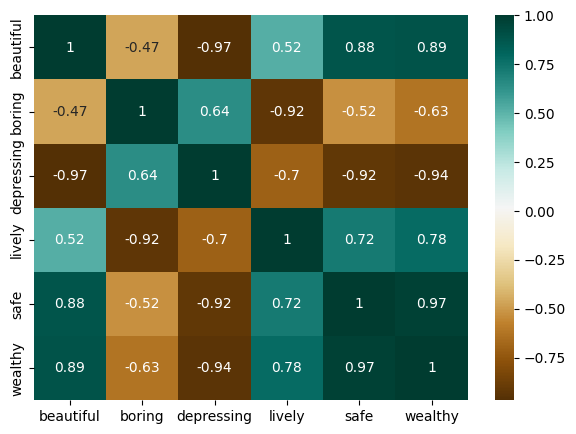

In [36]:
plt.figure(figsize=(7,5))
c= df.iloc[:, [1,2,3,4,5,6]].corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [17]:
df_com = df.groupby("comuna")[["beautiful", "boring", "depressing", "lively", "safe", "wealthy",
                                "hogares", "hog_40pct", "pct_hog40p"]].mean().reset_index()
df_com.head(5)

,comuna,beautiful,boring,depressing,lively,safe,wealthy,hogares,hog_40pct,pct_hog40p
0,Buin,0.391340,0.196812,-0.254279,-0.062516,0.412430,0.261089,643.000000,473.000000,0.735614
1,Calera de Tango,0.392086,0.225929,-0.279744,-0.149399,0.297352,0.220104,635.911950,386.534591,0.610414
2,Cerrillos,-0.290102,0.476748,0.355120,-0.438244,-0.298401,-0.331175,1049.599818,501.180948,0.478838
3,Cerro Navia,-0.071658,-0.156972,0.020247,0.094872,-0.055727,-0.094225,989.618879,682.468955,0.690300
4,Colina,-0.762115,1.428280,0.952300,-1.133956,-0.594475,-0.860659,1012.000000,7.000000,0.006917


In [18]:
def plot_ismt(data, target, cmap='BuPu', normalize=False, model_name=None):
    #data = data.to('cpu')

    # Listas de latitudes y longitudes (asegúrate de que tengan la misma longitud)
    latitudes = data.lat
    longitudes = data.lon

    plt.figure(figsize=(7, 6))
    real = data[target]

    cmap = plt.get_cmap(cmap)
    sc2 = plt.scatter(longitudes, latitudes, c=real, cmap=cmap, marker='o', s=4)
    plt.xticks([])
    plt.yticks([])
    plt.title('Safe perpectual values')
   

    cbar = plt.colorbar(sc2, label='Values', orientation='vertical')
    #plt.savefig('Img/safe_example.png')

    plt.tight_layout()
    plt.show()

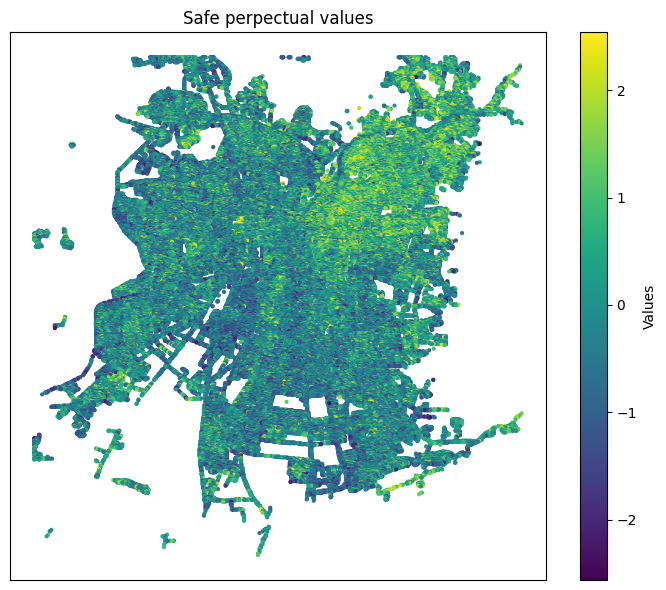

In [20]:
plot_ismt(df, 'wealthy', cmap='viridis')

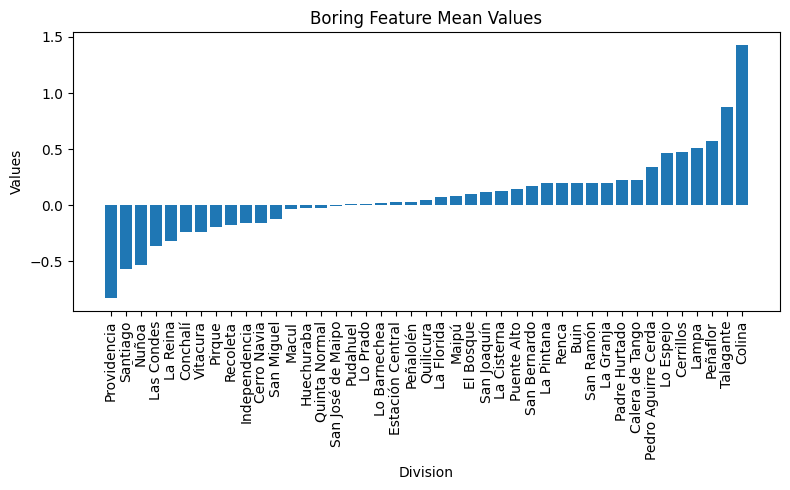

In [44]:
def plot_features_mean(feature_name, save_img=True):
  df_aux = df_com.sort_values(by=feature_name)
  x = df_aux["division"]
  y = df_aux[feature_name]
  plt.figure(figsize=(8,5))
  plt.bar(x, y)
  plt.xticks(rotation = 90)
  plt.title(feature_name.capitalize() + ' Feature Mean Values')
  plt.xlabel("Division")
  plt.ylabel("Values")
  
  plt.tight_layout()
  plt.show()

plot_features_mean("boring")